# Test d'Ipotesi

## Confronto i costi medi di spedizione verso il Nord e il Sud del Brasile

### Descrizione del Test

La colonna **customer_state**, che rappresenta lo stato brasiliano di residenza del cliente
(e quindi la destinazione della spedizione), viene divisa in due macro-regioni:

- **Nord**: stati della regione amazzonica.

- **Sud**: stati della regione meridionale.

- **Ipotesi Nulla (H0)**: non c'è una differenza statisticamente significativa tra i costi medi
  di spedizione verso il Nord e il Sud del Brasile.

- **Ipotesi Alternativa (HA)**: c'è una differenza statisticamente significativa tra i costi medi
  di spedizione verso il Nord e il Sud del Brasile.

- Il **livello di significatività** (α) sarà settato all'1% (99% di confidenza)

### Importazione Librerie e Caricamento Dati

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5)

# Carico i dati
orders =    pd.read_csv('output/order_dataset.csv')
items =     pd.read_csv('output/orders_items.csv')
customers = pd.read_csv('output/customers.csv')

In [14]:
# Aggiungo al dataframe merge il customer_id basandomi usando come chiave l'order_id
items = items.merge(orders[['order_id', 'customer_id']], on='order_id')
# Creo il dataframe df_full che contiene tutti i dati i dati di items con aggiunta la colonna customer_state
# ottenuta usando come chiave il customer_id
df_full = items.merge(customers[['customer_id', 'customer_state']], on='customer_id')

df_full.info()
df_full.sample(2)

<class 'pandas.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  str    
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  str    
 3   seller_id            112650 non-null  str    
 4   shipping_limit_date  112650 non-null  str    
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
 7   customer_id          112650 non-null  str    
 8   customer_state       112650 non-null  str    
dtypes: float64(2), int64(1), str(6)
memory usage: 7.7 MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_state
1678,03d9d682de9c41158e00e17ee26d9070,1,f5307d7c949134b78e68c51c13cc426e,c3cfdc648177fdbbbb35635a37472c53,2018-08-16 01:24:25,199.9,10.53,bbfe9dba014344feb9e3714b0b541885,PR
15115,226e0396e8ace4776eaf471b2d6abf89,1,157ee978f4fcdf8984b0bb33a6687fde,e9779976487b77c6d4ac45f75ec7afe9,2018-08-14 09:10:09,34.0,19.43,3d78789a9236efa5e2c7a1c03d426b0f,RJ


### Distinzione delle aree geografiche

In [16]:
sud = ['PR', 'SC', 'RS']
nord = ['AM', 'PA', 'RO', 'RR', 'AC', 'AP', 'TO']

<img src="img/brazil_regions_map.png" width="400">

In [20]:
treatment = df_full[df_full['customer_state'].isin(nord)]['freight_value']
control = df_full[df_full['customer_state'].isin(sud)]['freight_value']
alpha = 0.01

mu_treatment = np.mean(treatment)
mu_control = np.mean(control)
test_statistic = mu_treatment - mu_control

df = df_full[df_full['customer_state'].isin(nord + sud)][['customer_state', 'freight_value']]
number_of_permutations = 100
mu_diff_samples = []
for i in range(number_of_permutations):
    df_sample1 = df.sample(frac=0.5, replace=False)
    ix2 = set(df.index) - set(df_sample1.index)
    df_sample2 = df.loc[list(ix2)]
    mu_diff_temp = np.mean(df_sample1['freight_value']) - np.mean(df_sample2['freight_value'])
    mu_diff_samples.append(mu_diff_temp)

print("Statistica Test:", test_statistic)

Statistica Test: 15.601228242221307


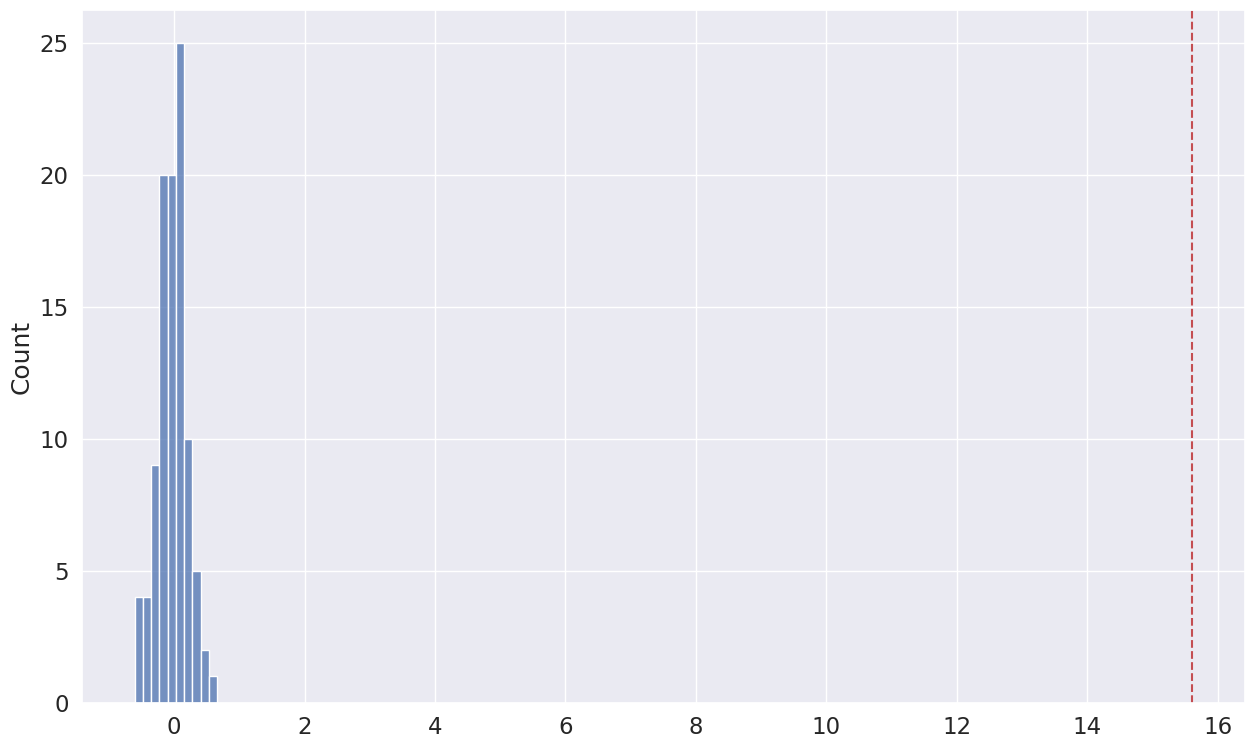

P-value: 0.0
Rifiuto H0, c'è una differenza statisticamente significativa tra i costi medi di spedizione verso il Nord e il Sud del Brasile.


In [21]:
sns.histplot(mu_diff_samples)
plt.axvline(test_statistic, 0, 1, color='r', linestyle='--')
plt.show()

p_value = sum(mu_diff_samples > test_statistic) / number_of_permutations
print("P-value:", p_value)
if p_value < alpha:
    print("Rifiuto H0, c'è una differenza statisticamente significativa tra i costi medi di spedizione verso il Nord e il Sud del Brasile.")
else:
    print("Accetto H0, non c'è una differenza statisticamente significativa tra i costi medi di spedizione verso il Nord e il Sud del Brasile.")

Rifiuto l'ipotesi nulla (H0).
Prima di iniziare il test avevo settato il livello di significatività (α) al 1% senza bias.
Facendo 100 permutazioni ottengo un p-value (ovvero la probabilità di osservare un valore più estremo della statistica test) uguale a 0.0.
Quindi, sto commettendo un errore dello 0% che rientra pienamente nel 5% (livello di significatività) prefissato prima del test.
Di conseguenza, posso affermare che al 99% l'ipotesi alternativa (HA) funziona.

Questo ce lo si poteva tranquillamente aspettare, dato che:
- Il Nord è dominato dalla Foresta Amazzonica e dal Rio delle Amazzoni, con infrastrutture
  logistiche molto limitate, poche strade e trasporti prevalentemente fluviali e aerei.
  Questo si traduce in costi di spedizione strutturalmente più elevati.

- Il Sud, con forte influenza europea (immigrazione italiana, tedesca, polacca), presenta
  infrastrutture stradali e logistiche molto efficienti, con costi di spedizione
  strutturalmente più bassi.